# MNIST - RNA com Keras

Rede Neural Artificial com Keras.

**MNIST** é um conjunto de dados que contém milhares de imagens manuscritas dos dígitos de 0-9. O desafio nesse dataset é, dada uma imagem qualquer, aplicar o label correspondente (classificar corretamente a imagem). O MNIST é tão estudado e utilizado pela comunidade, que atua como benchmark para comparar diferentes algoritmos de reconhecimento de imagens.

> Referências: 

+ https://github.com/keras-team/keras/blob/master/examples/mnist_mlp.py
+ https://elitedatascience.com/keras-tutorial-deep-learning-in-python
+ https://nextjournal.com/gkoehler/digit-recognition-with-keras
+ https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
+ https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [150]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten #camadas que são usadas em quase todas as redes neurais
#from keras.layers import Convolution2D, MaxPool2D #camadas da CNN de Keras. Estas são as camadas convolucionais que nos ajudarão a treinar eficientemente os dados de imagem:
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import model_from_json

#from keras.utils import np_utils #alguns utilitários. Isso nos ajudará a transformar nossos dados mais tarde:

batch_size = 128 #Tamanho do lote - quantas amostras usamos para uma atualização dos pesos do modelo.
num_classes = 10 #numero de classes para classificar de 0 á 9 digitos
epochs = 10 #numeros de epocas "passadas" por toda rede - quantas vezes queremos iterar

In [115]:
#split data to train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

#A etapa final de pré-processamento dos dados de entrada é converter nosso tipo de dados em float32 e 
#normalizar nossos valores de dados para o intervalo [0, 1].
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#A normalização dos dados de entrada ajuda a acelerar o treinamento.
x_train /=255
x_test /=255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [116]:
# dimensões do X_train
print(x_train.shape)

(60000, 784)


In [117]:
import numpy as np
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949], dtype=int64))


In [118]:
#from matplotlib import pyplot as plt
#plt.figure()
#plt.imshow(x_train[1])

In [119]:
#vamos dar uma olhada na forma dos dados da nossa etiqueta de classe
print(y_train.shape)

(60000,)


In [120]:
#Isso pode ser problemático. Devemos ter 10 classes diferentes, uma para cada dígito, mas parece que temos apenas uma matriz unidimensional. 
#Vamos dar uma olhada nos rótulos das 10 primeiras amostras de treinamento

print(y_train[:10])

#Um problema. Os dados y_train e y_test não são divididos em 10 rótulos de classe distintos, mas são 
#representados como uma única matriz com os valores da classe.
#Podemos consertar isso facilmente:

[5 0 4 1 9 2 1 3 1 4]


In [121]:
#convert class vectors to binary class matrices

#Converter matrizes de classe unidimensionais em matrizes de classe de 10 dimensões
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [122]:
print(y_train.shape)

(60000, 10)


In [123]:
print(y_train[:10])

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


### Definir a arquitetura do modelo.

![Image of Building Network](img/building_network.png)

784 inputs -> [512 hidden nodes] -> [512 hidden nodes]  -> 10 outputs

In [124]:
#Modelo da arquitetura
#construindo uma pilha linear de camadas com o modelo sequencial
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 

#Dropout - adicionamos o abandono como forma de prevenir o overfitting
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax')) #camada de saída com 10 neurônios

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


**Camada Densa** - 512 neuronios de entrada, com uma função de ativação "RELU" a forma como ele vai dar a saída. 784 é o tamanho da imagem em pixels 784 dados de entrada que essa rede vai receber.


**Camada Dropout** - Este é um método para regularizar o nosso modelo, a fim de evitar overfitting.
Com o dropout é desativado neuronios afim de evitar sobreajuste "overfiting" isso ocorre quando o algoritmo decora algum dado ele aprende demais. Referência: https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

**Camada de Saída** - Camada de saída com 10 neuronios. Utilizando a função de ativação "softmax".

In [125]:
filepath = "weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

#check 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5, mode='min')

callbacks_list = [checkpoint, early_stop]

### Compilação do Modelo

In [126]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Keras tem uma variedade de funções de perda https://keras.io/losses/ e otimizadores https://keras.io/optimizers/ prontos para escolher.

**Otimizador RMSProp.**
Recomenda-se deixar os parâmetros deste otimizador em seus valores padrão (exceto a taxa de aprendizado, que pode ser ajustada livremente).
Este otimizador é geralmente uma boa escolha para redes neurais recorrentes.

### Treinamento do Modelo

In [127]:
history = model.fit(x_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data=(x_test, y_test), callbacks = callbacks_list
                   )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.2455 - acc: 0.9248 - val_loss: 0.0985 - val_acc: 0.9695

Epoch 00001: val_loss improved from inf to 0.09852, saving model to weights.best.hdf5
Epoch 2/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0996 - acc: 0.9706 - val_loss: 0.0804 - val_acc: 0.9767 - loss: 0.0995

Epoch 00002: val_loss improved from 0.09852 to 0.08035, saving model to weights.best.hdf5
Epoch 3/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.0741 - acc: 0.9782 - val_loss: 0.0808 - val_acc: 0.9758

Epoch 00003: val_loss did not improve from 0.08035
Epoch 4/10
60000/60000 [==============================] - 13s 211us/step - loss: 0.0616 - acc: 0.9817 - val_loss: 0.0686 - val_acc: 0.9800

Epoch 00004: val_loss improved from 0.08035 to 0.06857, saving model to weights.best.hdf5
Epoch 5/10
60000/60000 [==============================] - 

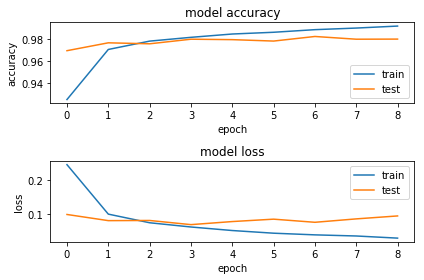

In [147]:
from matplotlib import pyplot as plt

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

Essa curva de aprendizado parece muito boa! Vemos que a perda no **conjunto de treinamento** está diminuindo rapidamente nas duas primeiras épocas. Isso mostra que a rede está aprendendo a classificar os dígitos rapidamente. Para o **conjunto de testes**, a perda não diminui tão rapidamente, mas permanece aproximadamente dentro da mesma faixa da perda de treinamento. Isso significa que nosso **modelo é generalizado para dados não vistos**.

### Salvar o Modelo

In [128]:
import os

save_dir = "results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at results/keras_mnist.h5 


### Avaliação do desempenho Modelo

É hora de colher os frutos do nosso treinamento em redes neurais. Vamos ver o desempenho do modelo no conjunto de testes. O método **model.evaluate()** calcula a perda e qualquer métrica definida ao compilar o modelo. Portanto, no nosso caso, a precisão é calculada nos **10.000 exemplos de testes** usando os pesos de rede fornecidos pelo modelo salvo.

In [148]:
#score
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0]) #retorna a último valor de perda
print('Test accuracy: ', score[1]) #retorna a última acurácia

Test loss: 0.0942142756066
Test accuracy:  0.9801


In [152]:
#com modelo salvo
mnist_model = load_model('results/keras_mnist.h5')
loss_and_metrics = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss_and_metrics[0]) #retorna a último valor de perda
print('Test accuracy: ', loss_and_metrics[1]) #retorna a última acurácia

Test loss: 0.0942142756066
Test accuracy:  0.9801


In [130]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [162]:
# carrega o modelo e cria previsões no conjunto de testes
mnist_model = load_model('results/keras_mnist.h5')
predicted_classes = mnist_model.predict_classes(x_test)

In [163]:
#ver o que previmos corretamente e quais não
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


0  classified correctly
1  classified incorrectly


C:\Users\r.tavares.da.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\r.tavares.da.silva\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: elementwise != comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.
